In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Social_Network_Ads.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

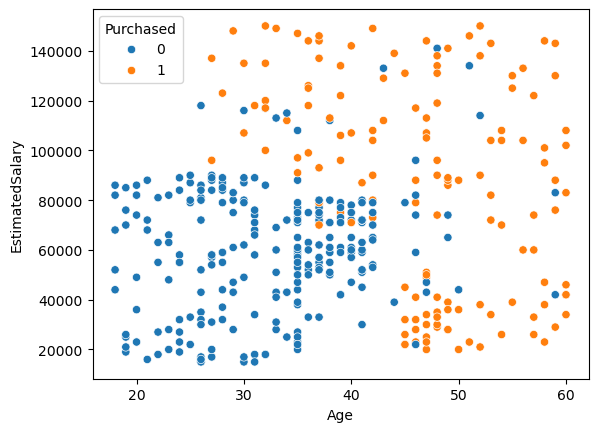

In [4]:
sns.scatterplot(x = "Age", y = "EstimatedSalary", data=df, hue="Purchased")
#if non linear data then perform Decision Tree algorithm

In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x = df.iloc[:,:-1]

In [7]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y = df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [12]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [13]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)

# Pre-Pruning

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
ds = DecisionTreeClassifier(max_depth=5) 
#Remove max depth and cheak score of both train and test u will se problem of overfitting
ds.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
ds.score(x_test, y_test)*100

91.25

In [36]:
ds.score(x_train, y_train)*100 

93.4375

In [39]:
from sklearn.tree import plot_tree

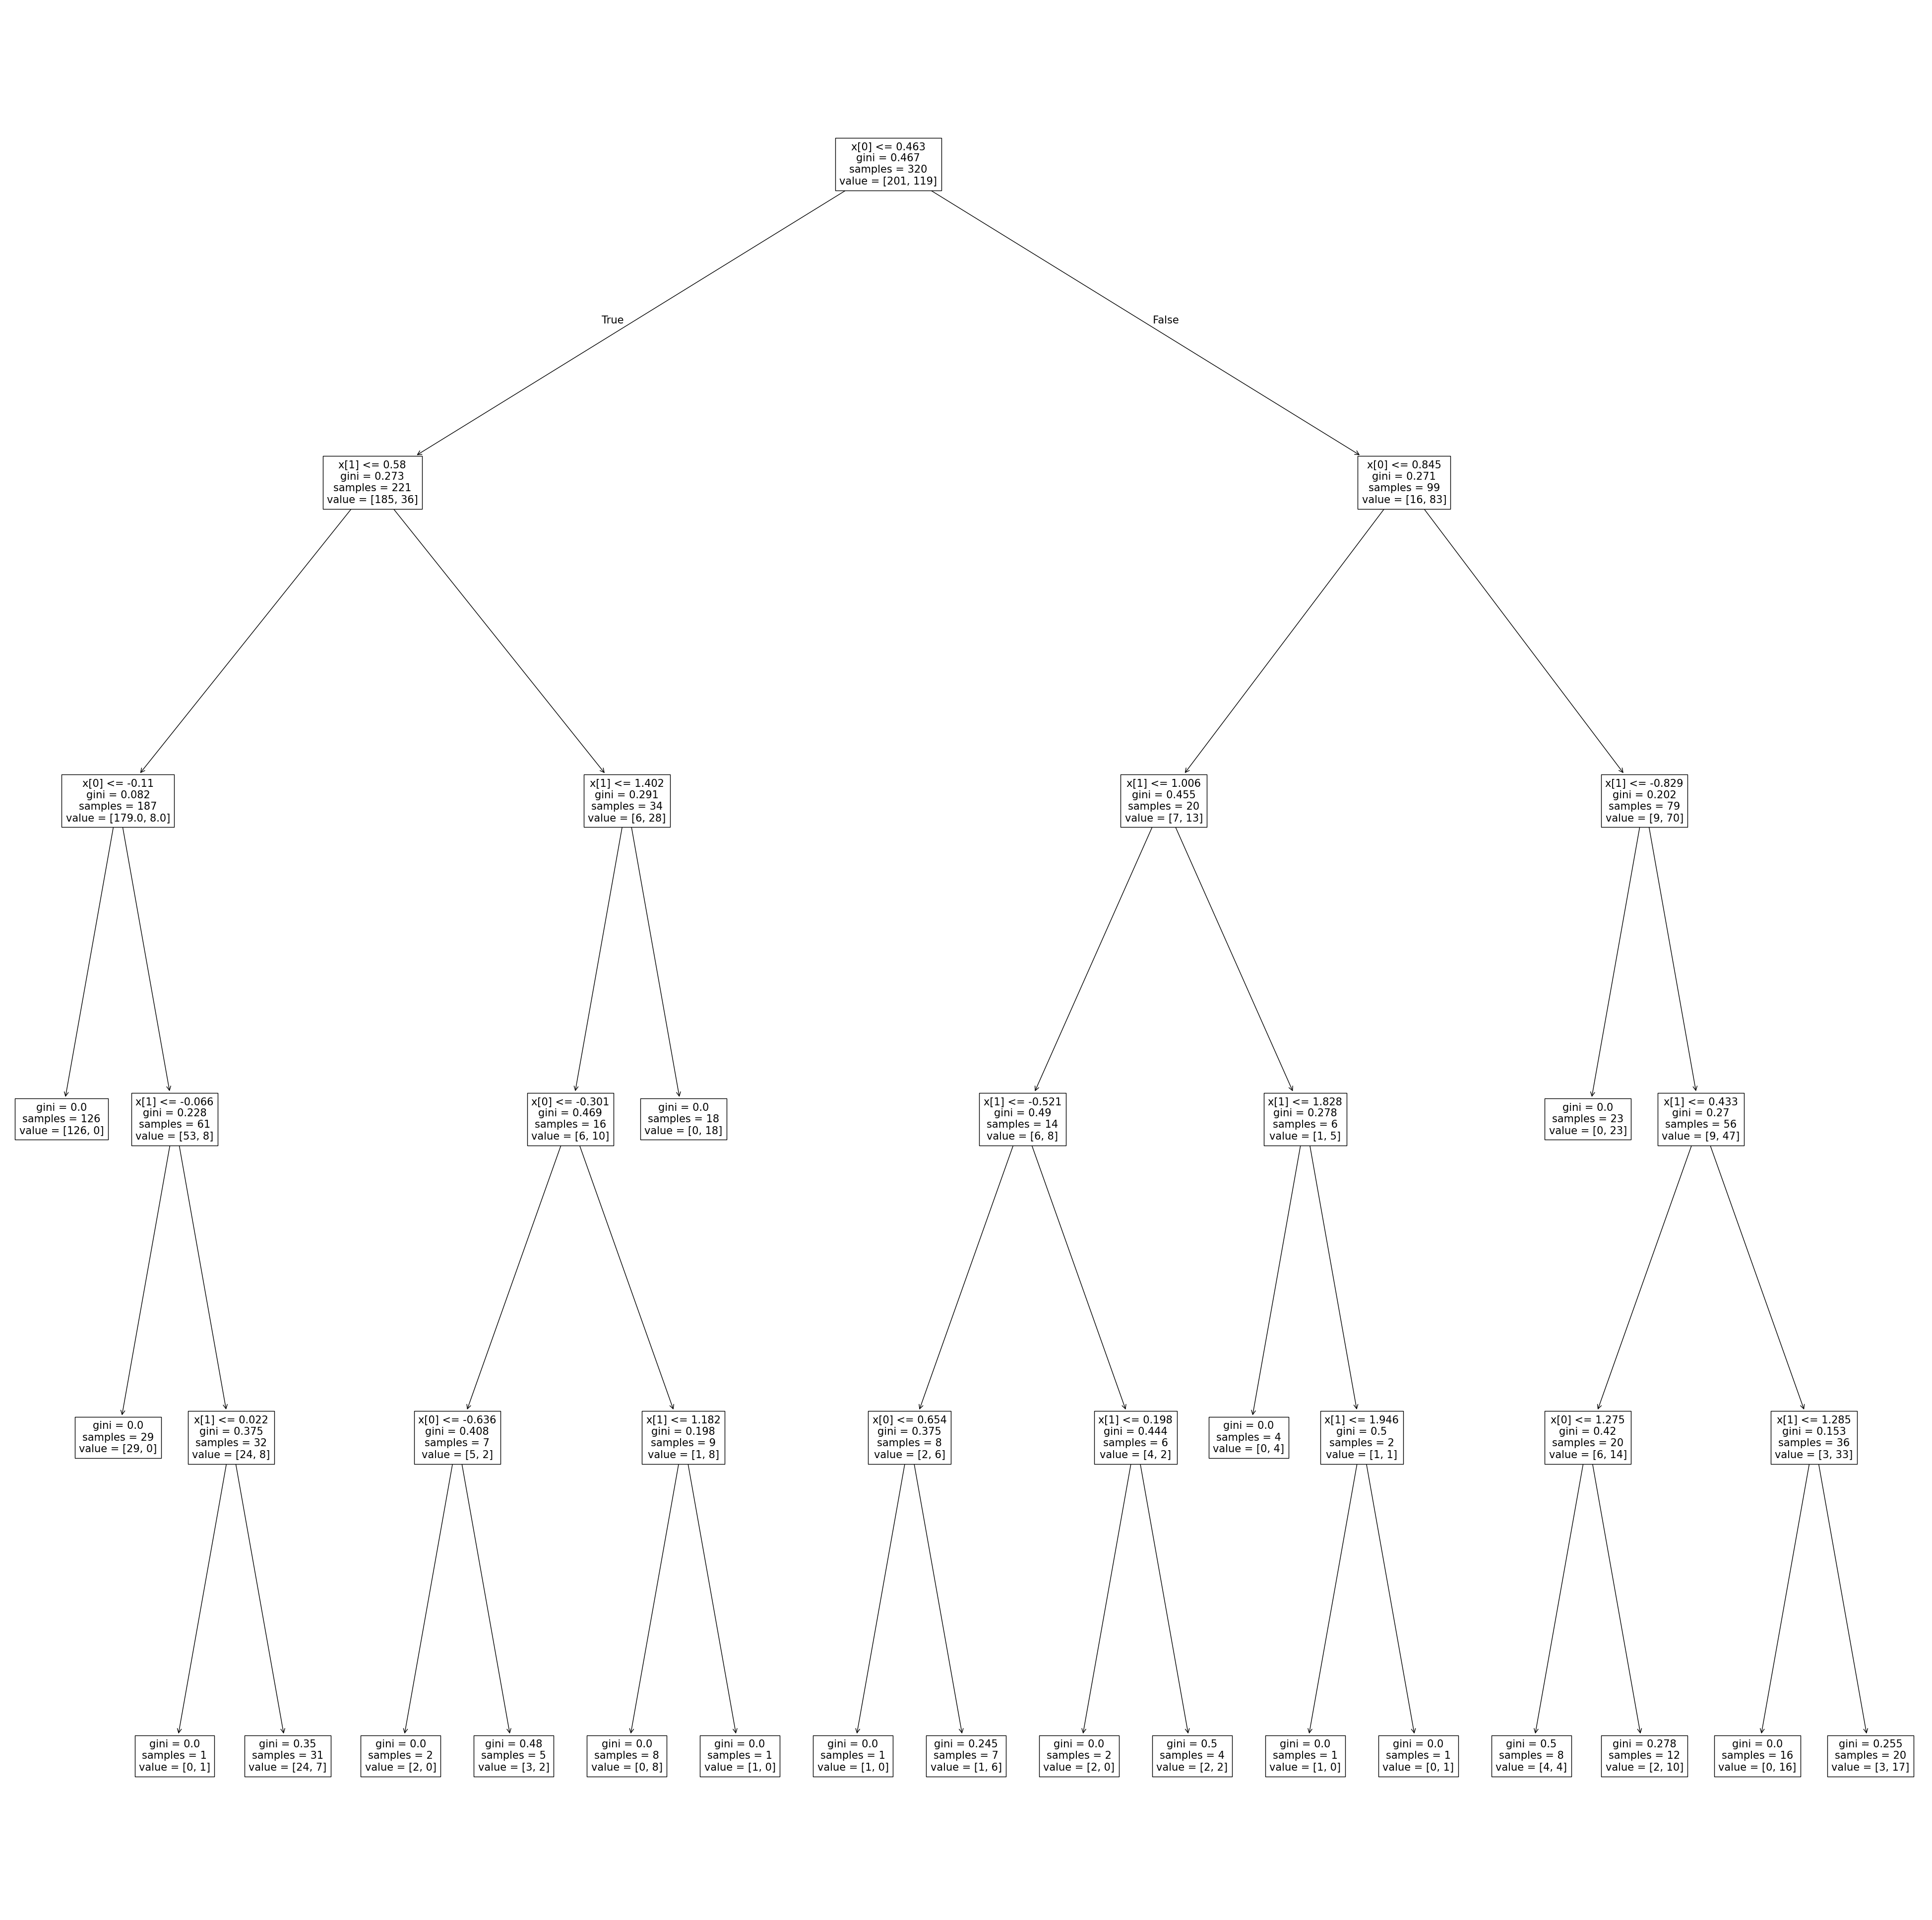

In [41]:
plt.figure(figsize=(50,50))
plot_tree(ds)
plt.savefig("Demo.jpg")
plt.show()

# Post-Pruning

In [43]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train, y_train)
    print(dt2.score(x_train, y_train), dt2.score(x_test, y_test),i)

0.8375 0.85 1
0.90625 0.9375 2
0.90625 0.9375 3
0.921875 0.9375 4
0.934375 0.9125 5
0.95625 0.8875 6
0.96875 0.9 7
0.975 0.9 8
0.978125 0.9 9
0.978125 0.9 10
0.9875 0.9 11
0.9875 0.9 12
0.9875 0.9 13
0.990625 0.8875 14
0.99375 0.8875 15
0.99375 0.8875 16
0.99375 0.8875 17
0.99375 0.8875 18
0.99375 0.8875 19


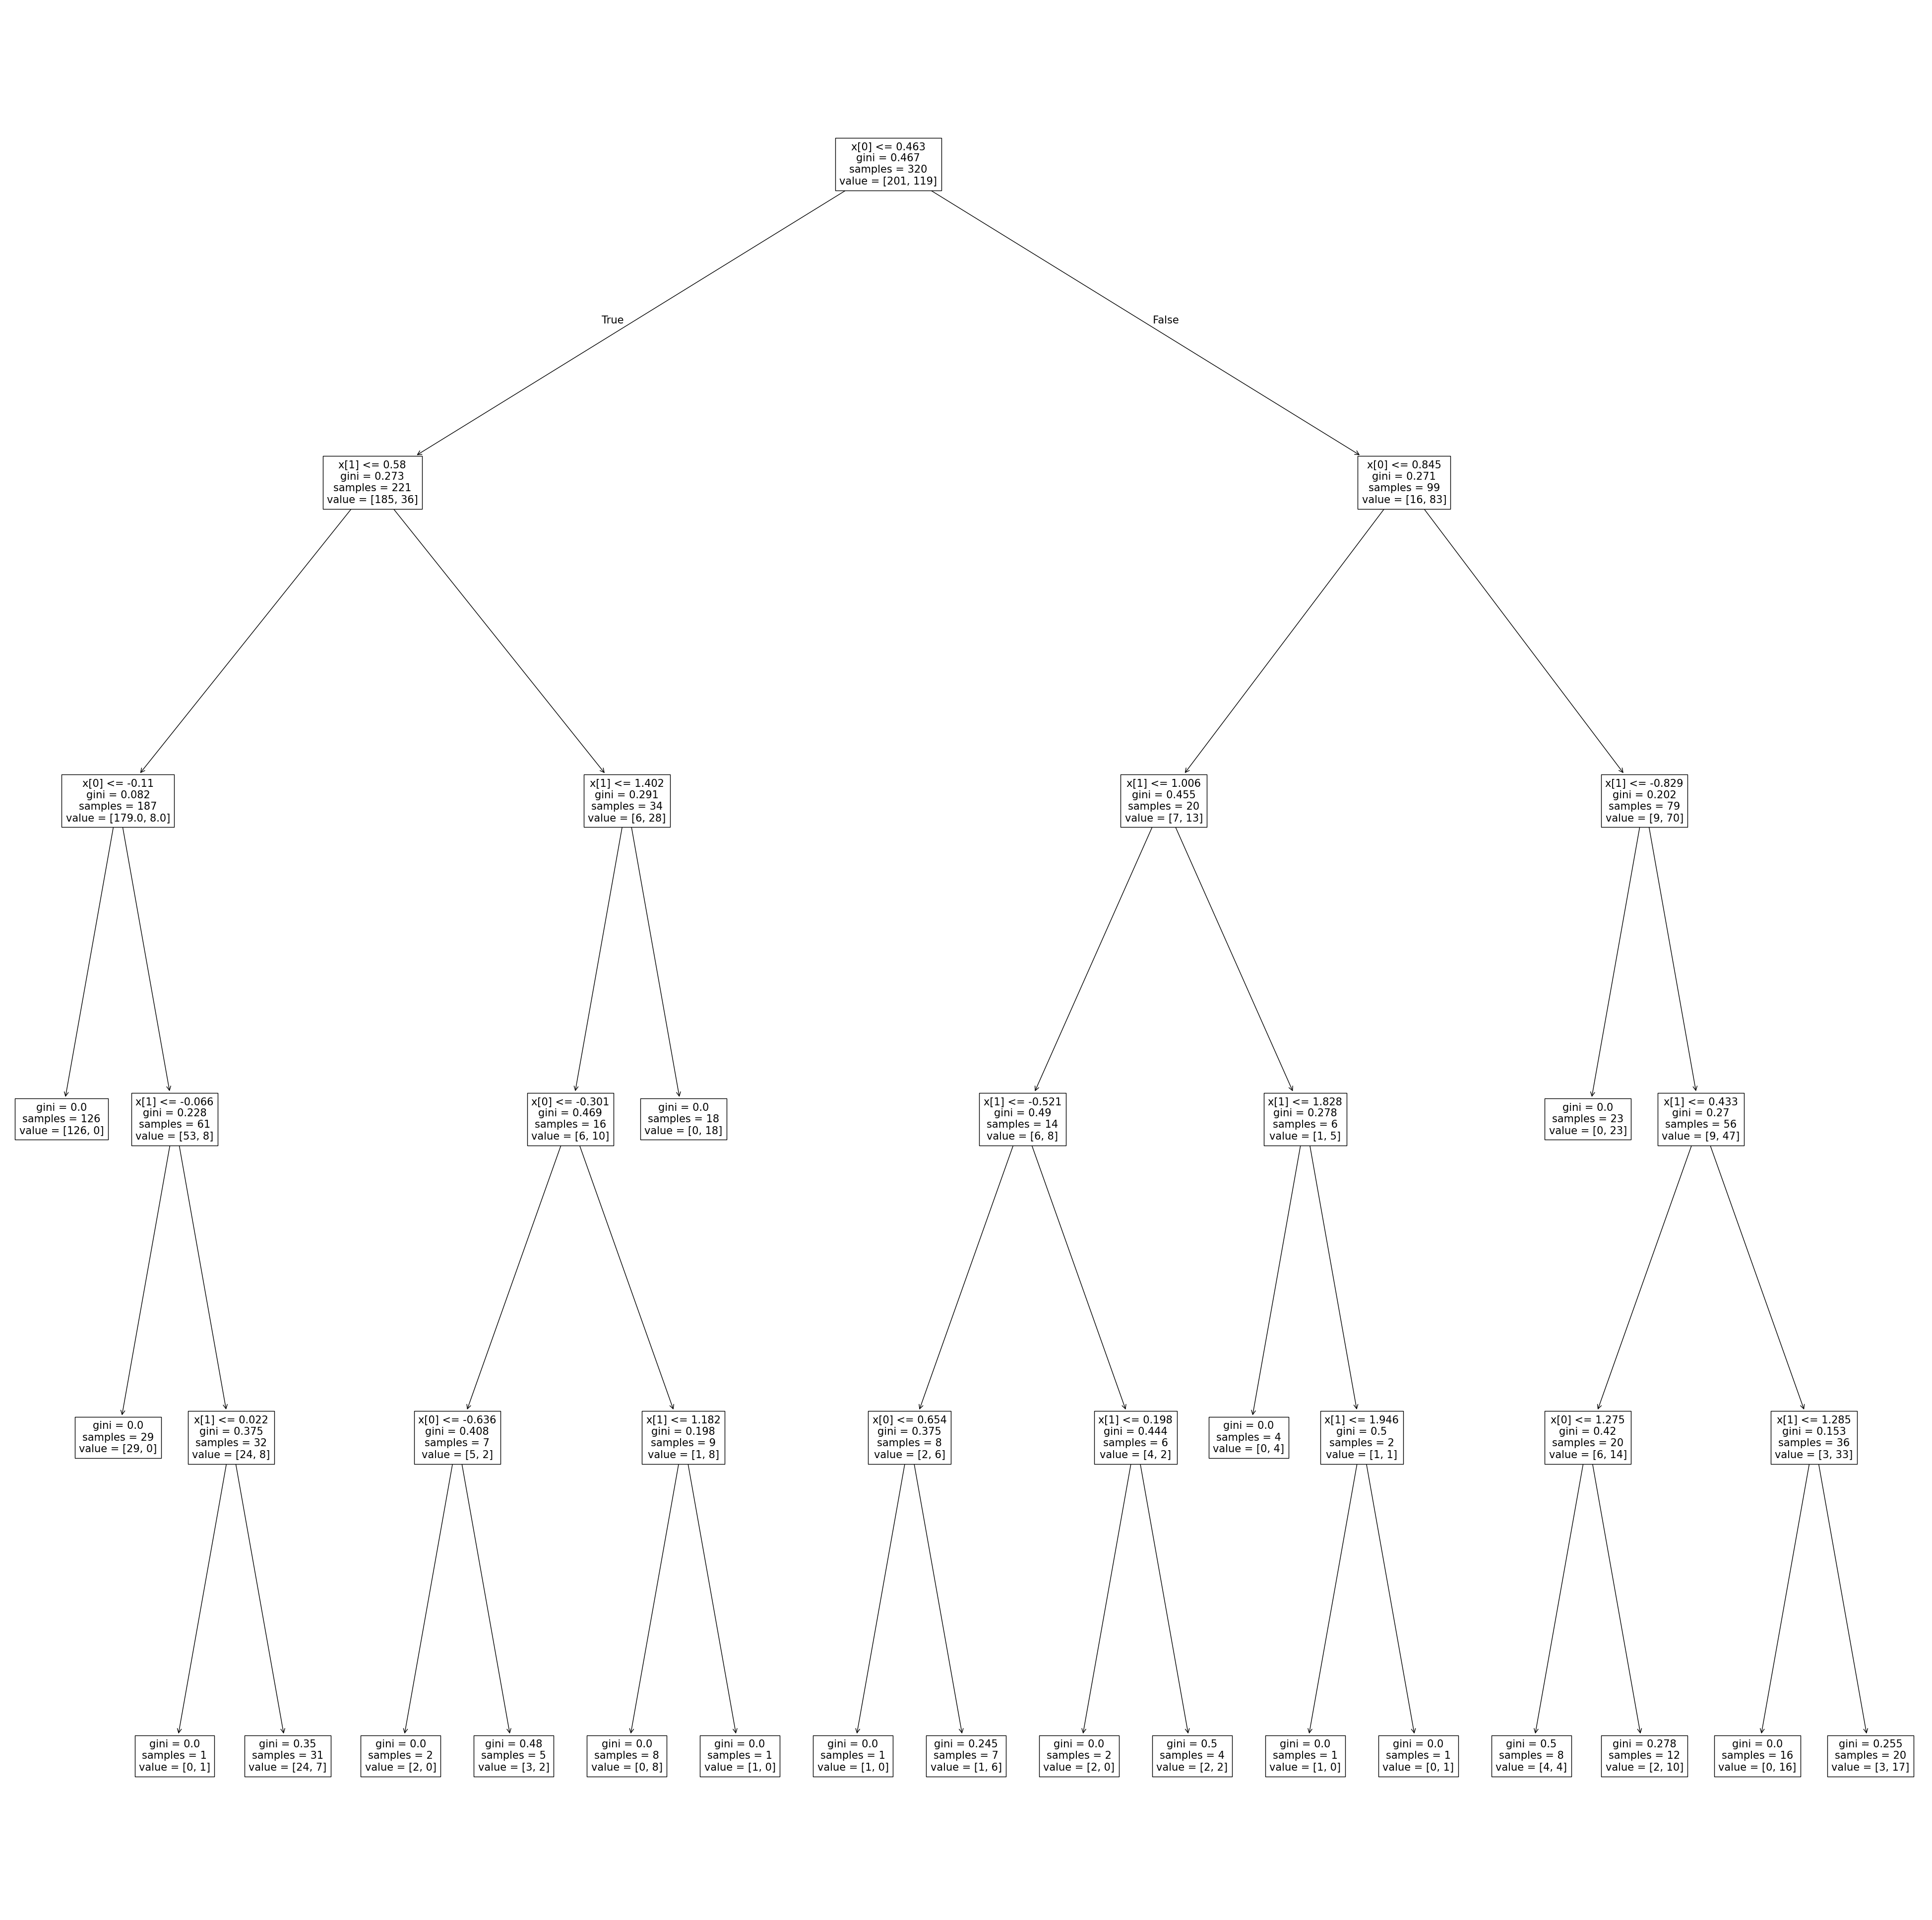

In [46]:
plt.figure(figsize=(50,50))
plot_tree(ds)
plt.savefig("Demo.jpg")
plt.show()